<a href="https://colab.research.google.com/github/Priyanka797/Exploratory-Data-Analysis-EDA-/blob/main/EDA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [4]:
# Load dataset
df = pd.read_csv("/content/personality_dataset.csv")

In [5]:
# Explore dataset
df.head()
df.tail()
df.info()
df.describe()
df.shape
df.size
df.max
df.min

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


<bound method DataFrame.min of       Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0                  4.0         No                      4.0            6.0   
1                  9.0        Yes                      0.0            0.0   
2                  9.0        Yes                      1.0            2.0   
3                  0.0         No                      6.0            7.0   
4                  3.0         No                      9.0            4.0   
...                ...        ...                      ...            ...   
2895               3.0         No                      7.0            6.0   
2896               3.0         No                      8.0            3.0   
2897               4.0        Yes                      1.0            1.0   
2898              11.0        Yes                      1.0            NaN   
2899               3.0         No                      6.0            6.0   

     Drained_after_socializing  Friends_circle_size  Post_frequency  \
0                           No                 13.0             5.0   
1                          Yes                  0.0             3.0   
2                          Yes                  5.0             2.0   
3                           No                 14.0             8.0   
4                           No                  8.0             5.0   
...                        ...                  ...             ...   
2895                        No                  6.0             6.0   
2896                        No                 14.0             9.0   
2897                       Yes                  4.0             0.0   
2898                       Yes                  2.0             0.0   
2899                        No                  6.0             9.0   

     Personality  
0      Extrovert  
1      Introvert  
2      Introvert  
3      Extrovert  
4      Extrovert  
...          ...  
2895   Extrovert  
2896   Extrovert  
2897   Introvert  
2898   Introvert  
2899   Extrovert  

[2900 rows x 8 columns]>

In [6]:
# Handling missing values
df.isnull().sum()
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mode()[0], inplace=True)
df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
df['Social_event_attendance'].fillna(df['Social_event_attendance'].mode()[0], inplace=True)
df['Going_outside' ].fillna(df['Going_outside' ].mode()[0], inplace=True)
df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0], inplace=True)
df['Friends_circle_size'].fillna(df['Friends_circle_size'].mode()[0], inplace=True)
df['Post_frequency'].fillna(df['Post_frequency'].mode()[0], inplace=True)
print (df)



      Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0                  4.0         No                      4.0            6.0   
1                  9.0        Yes                      0.0            0.0   
2                  9.0        Yes                      1.0            2.0   
3                  0.0         No                      6.0            7.0   
4                  3.0         No                      9.0            4.0   
...                ...        ...                      ...            ...   
2895               3.0         No                      7.0            6.0   
2896               3.0         No                      8.0            3.0   
2897               4.0        Yes                      1.0            1.0   
2898              11.0        Yes                      1.0            0.0   
2899               3.0         No                      6.0            6.0   

     Drained_after_socializing  Friends_circle_size  Post_frequency  \
0   

/tmp/ipython-input-4248142603.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mode()[0], inplace=True)
/tmp/ipython-input-4248142603.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [7]:
# Handling duplicates values
print(f"The duplicate: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"The duplicate: {df.duplicated().sum()}")



The duplicate: 460
The duplicate: 0


In [8]:
# Detect and Remove outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

# Removing outliers from Age and Fare
df = remove_outliers_iqr(df, 'Going_outside')
df = remove_outliers_iqr(df, 'Post_frequency')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2894,0.0,No,9.0,3.0,No,12.0,2.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,0.0,Yes,2.0,0.0,Introvert


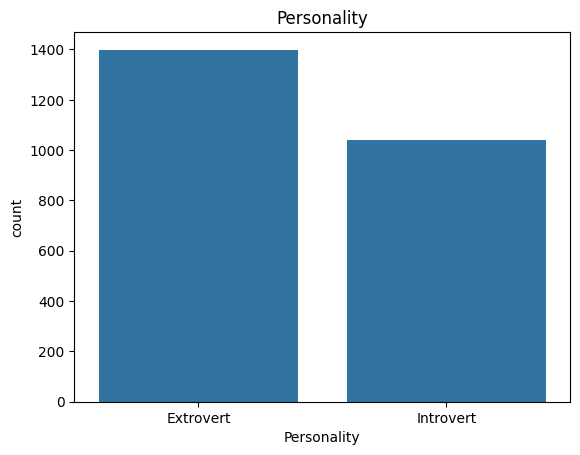

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


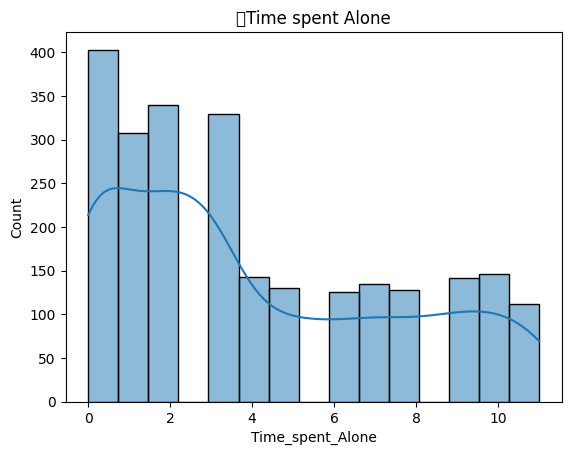

Stage_fear
No     57.5
Yes    42.5
Name: proportion, dtype: float64
Drained_after_socializing
No     57.581967
Yes    42.418033
Name: proportion, dtype: float64


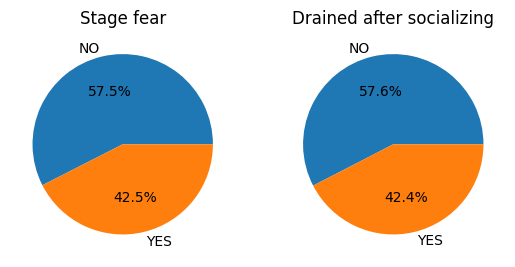

In [9]:
# Univariate Analysis
sns.countplot(x='Personality', data=df)
plt.title("Personality")
plt.show()

sns.histplot(df['Time_spent_Alone'], bins=15, kde=True)
plt.title("	Time spent Alone")
plt.show()


percentages = df['Stage_fear'].value_counts(normalize=True) * 100
print(percentages)
plt.subplot(1, 2, 1)
categories=['NO','YES']
Stage_fear = df['Stage_fear'].value_counts()
plt.pie(Stage_fear,labels=categories, autopct='%0.1f%%')
plt.title('Stage fear')

percentages = df['Drained_after_socializing'].value_counts(normalize=True) * 100
print(percentages)
plt.subplot(1, 2, 2)
Drained_after_socializing = df['Drained_after_socializing'].value_counts()
plt.pie(Drained_after_socializing, labels=categories, autopct='%0.1f%%')
plt.title('Drained after socializing')
plt.show()

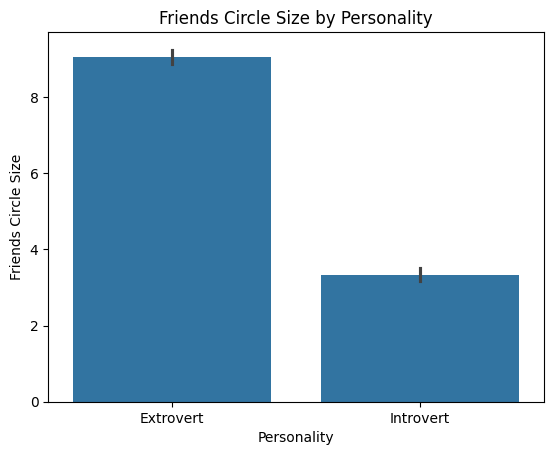

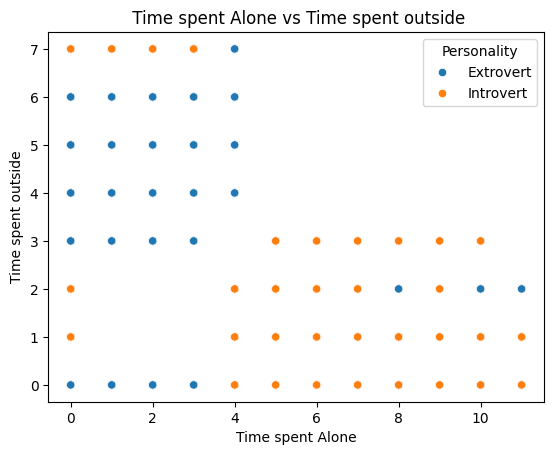

In [10]:

# Bivariate Analysis
sns.barplot(x='Personality', y='Friends_circle_size', data=df)
plt.title("Friends Circle Size by Personality")
plt.xlabel("Personality")
plt.ylabel("Friends Circle Size")
plt.show()

sns.scatterplot(x='Time_spent_Alone', y='Going_outside',hue ='Personality', data=df)
plt.title(" Time spent Alone vs Time spent outside")
plt.xlabel("Time spent Alone")
plt.ylabel("Time spent outside")
plt.show()



In [11]:
scaler = MinMaxScaler()
df[['Social_event_attendance']] = scaler.fit_transform(df[['Social_event_attendance']])
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,0.4,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,0.1,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,0.6,7.0,No,14.0,8.0,Extrovert
4,3.0,No,0.9,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2894,0.0,No,0.9,3.0,No,12.0,2.0,Extrovert
2896,3.0,No,0.8,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,0.1,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,0.1,0.0,Yes,2.0,0.0,Introvert


In [12]:
standardizer = StandardScaler()
df[['Social_event_attendance']] = standardizer.fit_transform(df[['Social_event_attendance']])
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,-0.070588,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,-1.451226,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,-1.106067,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,0.619731,7.0,No,14.0,8.0,Extrovert
4,3.0,No,1.655210,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2894,0.0,No,1.655210,3.0,No,12.0,2.0,Extrovert
2896,3.0,No,1.310050,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,-1.106067,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,-1.106067,0.0,Yes,2.0,0.0,Introvert
